## Imports

In [2]:
# from class_source.idata_client import IData
from idmmonitor import IData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## API Code

In [3]:
# Variables to use
API_KEY = "58F2Z-RBUEV-6AJ4T-SL3IC"
print(API_KEY)

# initialise
idata = IData()
# echo request information on
#idata.set_verbose(True)

#Store the API Key in the package
idata.set_api_key(API_KEY)


result = idata.get_user_favorites()
if (result is None):
    print("Could not get the user datasources. Check terminal for errors.")
else:
    print(result)

print('')
print("End...")

58F2Z-RBUEV-6AJ4T-SL3IC

{'Metadata': {'Datasets': 22, 'Updated': '2021-12-30T15:46:48Z', 'TimeStamp': 2459579.1575, 'Page': 1, 'PageCount': 1, 'Rows': 22}, 'Datasets': [{'Datasource': 'ECBFX', 'Symbol': 'EURGBP', 'Name': 'ECB - Euro vs Pound Sterling', 'Description': 'European Central Bank exchange rate for Euro vs Pound Sterling (EUR/GBP)', 'Frequency': 'Day', 'Currency': None, 'Unit': None, 'Decimals': None, 'Bates': ['Close'], 'BateIndex': [0], 'StartDate': '1999-01-04', 'EndDate': '2021-12-30', 'Values': 5941, 'Corrections': 0, 'Premium': False, 'Favorite': True, 'IsCategoryDS': False, 'Subscription': 'Active', 'Logo': 'http://adm-gui.intdatamedia.com/datasources/ECBLA.png', 'Status': 200, 'Details': 'OK'}, {'Datasource': 'ECBFX', 'Symbol': 'EURCNY', 'Name': 'ECB - Euro vs Chinese yuan Renminbi', 'Description': 'European Central Bank exchange rate for Euro vs Chinese yuan Renminbi (EUR/CNY)', 'Frequency': 'Day', 'Currency': None, 'Unit': None, 'Decimals': None, 'Bates': ['Close'],

## Get_User_Favorites()

In [4]:
result_1 = idata.get_dataset_values_rc([{"Datasource":"ECBFX","Symbol":"EURGBP"}, {"Datasource":"ECBFX","Symbol":"EURUSD"}])


-----------------------------------
POST
URL: 
https://api.idatamedia.org/
API: 
GetValuesRC
Payload: 
{'SessionToken': '3c7b7bfa8ccf8a1e54e996bb281a0d59', 'Series': [{'Datasource': 'ECBFX', 'Symbol': 'EURGBP'}, {'Datasource': 'ECBFX', 'Symbol': 'EURUSD'}], 'StartDate': 'Earliest', 'EndDate': 'Latest', 'Periods': 0, 'CommonStart': 'false', 'CommonEnd': 'false', 'CommonUA': 'true', 'DateFormat': 'YYYY-MM-DD', 'DateOrder': 'asc', 'Prefill': 'false', 'Fill': 'false', 'Frequency': 'd', 'Postfill': 'false', 'Rounding': 'auto', 'ReturnMetadata': 'false', 'ReturnAccess': 'false', 'ReturnParameters': 'false'}



Functions that help ous access the data.

In [5]:
def get_daily_data(dictionary):

    columns = dictionary['Columns']
    rows = dictionary['Rows']
    corrections = dictionary['Corrections']
    df = pd.DataFrame(rows.values(), columns = [columns[0]['Name'], columns[1]['Name']], index = rows.keys())
    df = df.reset_index()
    df.rename(columns = {'index':'Date'}, inplace = True)
    df.dropna(axis = 0, inplace = True)
    df["Date"] = pd.to_datetime(df['Date'])
    df.insert(1, 'Year', df.Date.dt.year)
    df.insert(2, 'Month', df.Date.dt.month)

    return df

def get_averages(df):
    theList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    theList_upd = {i+1:word for i,word in enumerate(theList)}

    df = df.groupby(['Year', 'Month'], as_index= False).agg({"ECB - Euro vs Pound Sterling": np.mean, "ECB - Euro vs US Dollar":np.mean})
    df['Month'] = df['Month'].replace(theList_upd)
    df.rename(columns = {"ECB - Euro vs Pound Sterling": "ECB - Euro vs Pound Sterling Mean", "ECB - Euro vs US Dollar": "ECB - Euro vs US Dollar Mean"}, inplace = True)
    return df

def get_processed(df):
    theList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    eurgbp = df.iloc[:, :-1]
    eurusd = df.drop(columns = ['ECB - Euro vs Pound Sterling Mean'], axis = 1)
    datas = [eurgbp, eurusd]
    for num, data in enumerate(datas):    
        temp = []
        for i in range(0, len(data), 12):
            lists = data.iloc[i:i+12, -1].values.tolist()
            temp.append(lists)
        datas[num] = pd.DataFrame(temp, columns = theList, index = data.Year.unique().tolist()).round(3)
    datas = tuple(datas)
    
    return datas

Retrieving the data.


In [6]:
dataframe = get_daily_data(result_1)
dataframe.head(10)

,Date,Year,Month,ECB - Euro vs Pound Sterling,ECB - Euro vs US Dollar
0,1999-01-04,1999,1,0.71110,1.1789
1,1999-01-05,1999,1,0.71220,1.1790
2,1999-01-06,1999,1,0.70760,1.1743
3,1999-01-07,1999,1,0.70585,1.1632
4,1999-01-08,1999,1,0.70940,1.1659
7,1999-01-11,1999,1,0.70440,1.1569
8,1999-01-12,1999,1,0.70660,1.1520
9,1999-01-13,1999,1,0.70840,1.1744
10,1999-01-14,1999,1,0.70620,1.1653
11,1999-01-15,1999,1,0.70390,1.1626


The methods we will use require our data to be a Time-Series. That means the index of our Data-Frame has to be of type datetime. Also our data is recorded on bussiness days only, so we set frequency to "b", which means bussiness days.

In [7]:
dataframe["Date"] = pd.to_datetime(dataframe["Date"])
dataframe.set_index("Date", inplace=True)
dataframe = dataframe.asfreq('b')
dataframe = dataframe.fillna(method='ffill')

We will run the ACF plot, which show the auto-correlation between different lags.

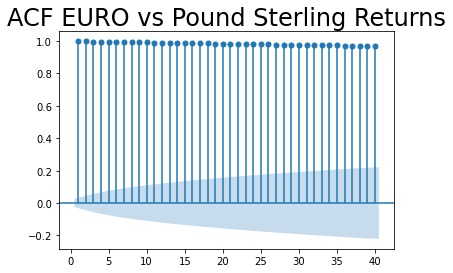

In [8]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(dataframe["ECB - Euro vs Pound Sterling"], lags=40, zero = False)
plt.title("ACF EURO vs Pound Sterling Returns", size=24)
plt.show()

The height of the dots is the auto-correlation coefficient. The blue shadow indicates the significance threshold, dots outside of are significant. 

As we can observe the all auto-correlation coefficients are quite high and significant. 

The problem with ACF is that it measures the compound auto-correlation, meaning the auto-correlation of lag t includes the effects of all periods from the current until t.

To deal with this deffiency we introduce the so called Partial Auto-Correlation.

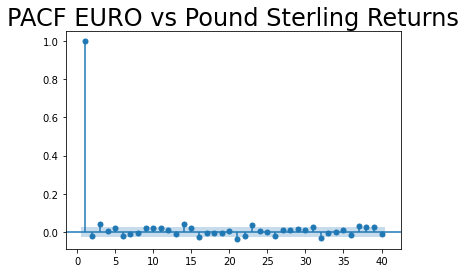

In [9]:
sgt.plot_pacf(dataframe["ECB - Euro vs Pound Sterling"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF EURO vs Pound Sterling Returns", size=24)
plt.show()

We can see the effects of individual lags are much smaller, some of them are even negative. The first lag is however the same as in ACF, as there is not compound effect to stript out. 

This test gives a clearer picture as ACF and should be used to help determine the number of lags in Auto-Regressive models.